<a href="https://colab.research.google.com/github/Rosangelafl/Eleicoes_Brasil/blob/master/candidatos_eleicoes2020_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise dos dados do TSE, eleições locais 2020. 

Fonte:https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

Baixados em 1 de setembro 2020

Planilhas csv e documentação em https://bit.ly/3jLmQt5


In [4]:
#importando as bibliotecas e definindo estilo dos gráficos

import pandas as pd
from pathlib import Path
import glob, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#estilo 

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [5]:
# Juntando as planilhas, uma para cada estado, apenas com a colunas para análises

path = r'/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/consulta_cand_2020' 
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', quotechar='"', 
                     usecols=['NM_UE','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NM_URNA_CANDIDATO', 'SG_PARTIDO',
                              'NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_COR_RACA','DS_OCUPACAO',
                              'VR_DESPESA_MAX_CAMPANHA'])
                   
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [6]:
df.index

RangeIndex(start=0, stop=1096678, step=1)

In [7]:
#verificando valores nulos
df.isnull().sum()

NM_UE                      0
DS_CARGO                   0
SQ_CANDIDATO               0
NM_CANDIDATO               0
NM_URNA_CANDIDATO          6
SG_PARTIDO                 0
NR_IDADE_DATA_POSSE        0
DS_GENERO                  0
DS_GRAU_INSTRUCAO          0
DS_COR_RACA                0
DS_OCUPACAO                0
VR_DESPESA_MAX_CAMPANHA    0
dtype: int64

In [8]:
df.head(3).T

,0,1,2
NM_UE,PORTO GRANDE,MAZAGÃO,MAZAGÃO
DS_CARGO,VEREADOR,VEREADOR,VEREADOR
SQ_CANDIDATO,30000964748,30001199478,30001199476
NM_CANDIDATO,MARCIO ALESSANDRO MARQUES DOS SANTOS,MARIA ALDA MONTEIRO DE OLIVEIRA DA SILVA,THOMAS CARDOSO VIDEIRA
NM_URNA_CANDIDATO,MARCIO DO MATAPI,MARIA ALDA,THOMAS VIDEIRA
SG_PARTIDO,PL,REPUBLICANOS,REPUBLICANOS
NR_IDADE_DATA_POSSE,37,42,27
DS_GENERO,MASCULINO,FEMININO,MASCULINO
DS_GRAU_INSTRUCAO,SUPERIOR COMPLETO,ENSINO MÉDIO COMPLETO,SUPERIOR INCOMPLETO
DS_COR_RACA,PARDA,PARDA,PARDA


In [9]:
# Descobrindo quantos candidatos/valores únicos

df['SQ_CANDIDATO'].nunique()

548339

In [10]:
# Elimando as linhas duplicadas
df.drop_duplicates(keep='last', inplace=True)

In [11]:
#Juntando os csv do TSE com os bens dos candidatos do país todo, disponível em https://bit.ly/3lnh6Ge

bens_cand = pd.read_csv('/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, decimal=',',
                        sep=';', quotechar='"', usecols=['SG_UF', 'SG_UE','SQ_CANDIDATO','DS_BEM_CANDIDATO','VR_BEM_CANDIDATO'])

In [12]:
bens_cand.head()

,SG_UF,SG_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,SP,62693,250000666093,dinheiro em especie,30000.0
1,PB,20192,150000666102,FORD KA - 2015,30000.0
2,MG,43338,130000679355,VEICULO ONIX PLUS 2020,75060.0
3,SP,61778,250000679376,1% de quotas da empresa Orion Comércio de GLP ...,300.0
4,SC,80330,240000679388,CONTA CORRENTE VIACREDI,500.0


In [13]:
bens_cand.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in bens_cand.columns] 

In [14]:
bens_cand.isnull().sum()

SG_UF               0
CODIGO_TSE          0
SQ_CANDIDATO        0
DS_BEM_CANDIDATO    0
VR_BEM_CANDIDATO    0
dtype: int64

In [15]:
bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997298 entries, 0 to 997297
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SG_UF             997298 non-null  object 
 1   CODIGO_TSE        997298 non-null  int64  
 2   SQ_CANDIDATO      997298 non-null  int64  
 3   DS_BEM_CANDIDATO  997298 non-null  object 
 4   VR_BEM_CANDIDATO  997298 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.0+ MB


In [16]:
# Somando os bens por candidato 

df_bens = pd.pivot_table(bens_cand,index=['SQ_CANDIDATO'],aggfunc={'VR_BEM_CANDIDATO':np.sum})
df_bens   

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
10000641345,319500.00
10000641349,179000.00
10000641351,7000.00
10000641352,150000.00
10000641353,150000.00
...,...
270001259283,5000.00
270001259590,635000.00
270001259713,1500.00


In [17]:
#Criando a planilha final

candidatos = df.merge(df_bens, on='SQ_CANDIDATO', how='left')
candidatos.head(3).T

,0,1,2
NM_UE,MAURILÂNDIA,PALMEIRA DOS ÍNDIOS,JESÚPOLIS
DS_CARGO,VEREADOR,VEREADOR,VICE-PREFEITO
SQ_CANDIDATO,90001032264,20001022098,90000846770
NM_CANDIDATO,VALDINEI SILVA VIEIRA,CICERO JOAQUIM DOS SANTOS,MARCIO APARECIDO DA SILVA CAMARGO
NM_URNA_CANDIDATO,DINEI MOTOS,BARRERITO,MÁRCIO CAMARGO
SG_PARTIDO,MDB,PSB,PL
NR_IDADE_DATA_POSSE,40,57,43
DS_GENERO,MASCULINO,MASCULINO,MASCULINO
DS_GRAU_INSTRUCAO,ENSINO MÉDIO COMPLETO,ENSINO FUNDAMENTAL COMPLETO,SUPERIOR COMPLETO
DS_COR_RACA,PARDA,PARDA,BRANCA


In [18]:
candidatos.isnull().sum()

NM_UE                           0
DS_CARGO                        0
SQ_CANDIDATO                    0
NM_CANDIDATO                    0
NM_URNA_CANDIDATO               3
SG_PARTIDO                      0
NR_IDADE_DATA_POSSE             0
DS_GENERO                       0
DS_GRAU_INSTRUCAO               0
DS_COR_RACA                     0
DS_OCUPACAO                     0
VR_DESPESA_MAX_CAMPANHA         0
VR_BEM_CANDIDATO           213040
dtype: int64

In [19]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548339 entries, 0 to 548338
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NM_UE                    548339 non-null  object 
 1   DS_CARGO                 548339 non-null  object 
 2   SQ_CANDIDATO             548339 non-null  int64  
 3   NM_CANDIDATO             548339 non-null  object 
 4   NM_URNA_CANDIDATO        548336 non-null  object 
 5   SG_PARTIDO               548339 non-null  object 
 6   NR_IDADE_DATA_POSSE      548339 non-null  int64  
 7   DS_GENERO                548339 non-null  object 
 8   DS_GRAU_INSTRUCAO        548339 non-null  object 
 9   DS_COR_RACA              548339 non-null  object 
 10  DS_OCUPACAO              548339 non-null  object 
 11  VR_DESPESA_MAX_CAMPANHA  548339 non-null  int64  
 12  VR_BEM_CANDIDATO         335299 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 58.6+ MB


In [20]:
#candidatos.drop_duplicates(keep='last', inplace=True)

In [21]:
#Checando se a quantidade de candidatos não foi alterada com o merge

candidatos['SQ_CANDIDATO'].nunique()

548339

In [22]:
candidatos.groupby(by='DS_GENERO').size()

DS_GENERO
FEMININO     181848
MASCULINO    366491
dtype: int64

In [23]:
#Printando a porcentagem de homens e mulheres candidatas e depois plotando

print('candidatas:', ((181848/548339) *100))
print('candidatos:', ((366491/548339) *100))

candidatas: 33.16342627462209
candidatos: 66.83657372537792


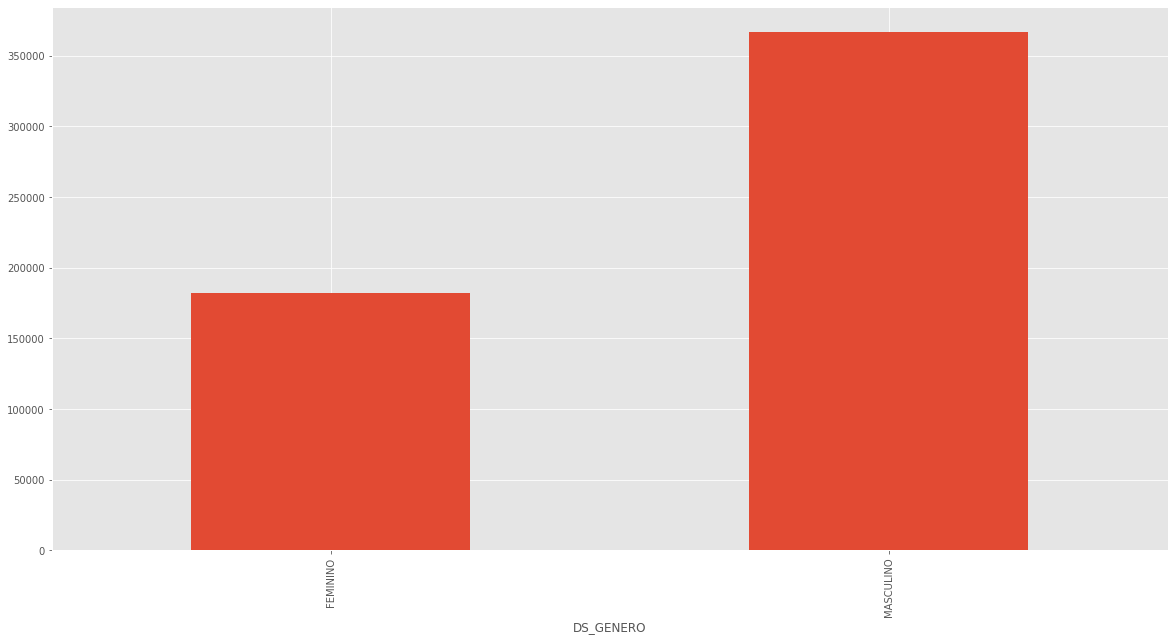

In [24]:
genero = df.groupby(by='DS_GENERO').size()
genero.plot(kind ='bar')
plt.show()

In [25]:
df.groupby(by='DS_COR_RACA').size()

DS_COR_RACA
AMARELA             1946
BRANCA            262048
INDÍGENA            2173
PARDA             216341
PRETA              57345
SEM INFORMAÇÃO      8486
dtype: int64

In [26]:
raca = df.groupby(by='DS_COR_RACA').size()

In [27]:
print('candidatos autodeclarados de origem asiatica:', ((1946/ 548339) *100))
print('candidatos autodeclarados brancos:', ((262048/ 548339) *100))
print('candidatos autodeclarados indigenas:', ((2173/ 548339) *100))
print('candidatos autodeclarados pardos:', ((216341/ 548339) *100))
print('candidatos autodeclarados pretos:', ((57345/ 548339) *100))
print('candidatos que não declararam raça/etnia:', ((8486/ 548339) *100))

candidatos autodeclarados de origem asiatica: 0.35488994946556784
candidatos autodeclarados brancos: 47.7894149422164
candidatos autodeclarados indigenas: 0.39628769793868396
candidatos autodeclarados pardos: 39.453877984239675
candidatos autodeclarados pretos: 10.457946635201946
candidatos que não declararam raça/etnia: 1.5475827909377229


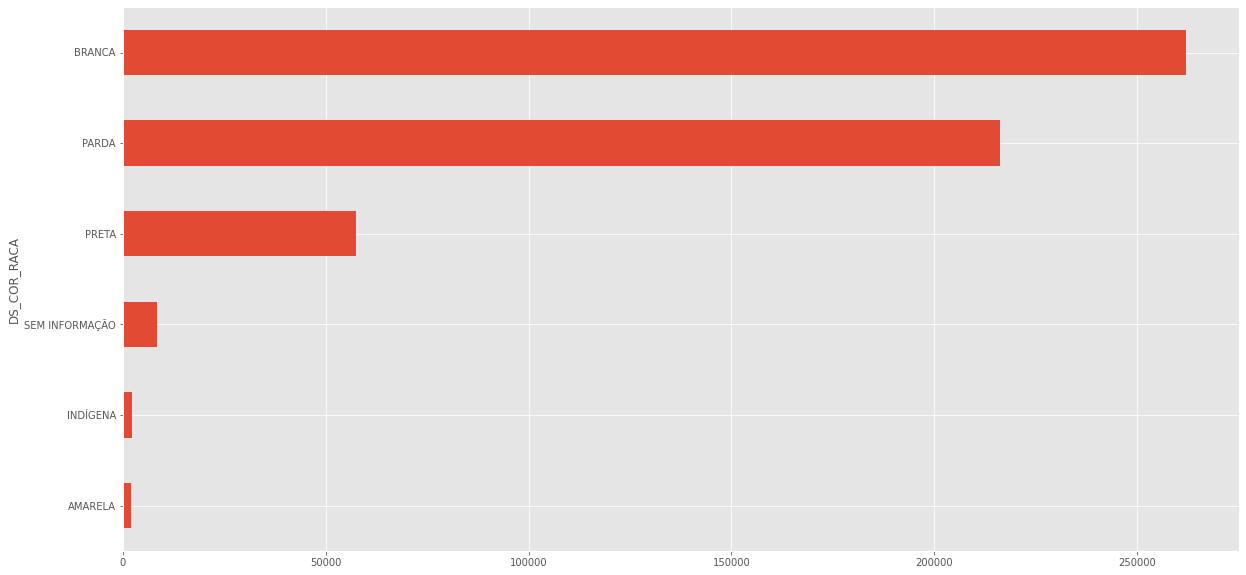

In [28]:
raca.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [29]:
candidatos['DS_OCUPACAO'].value_counts()

OUTROS                          116846
AGRICULTOR                       37464
SERVIDOR PÚBLICO MUNICIPAL       35299
EMPRESÁRIO                       32922
COMERCIANTE                      30271
                                 ...  
DIPLOMATA                            1
CONTROLADOR DE TRÁFEGO AÉREO         1
GEOFÍSICO                            1
METEOROLOGISTA                       1
MINISTRO DO PODER JUDICIÁRIO         1
Name: DS_OCUPACAO, Length: 243, dtype: int64

In [30]:
candidatos.groupby(by='DS_GENERO')['DS_OCUPACAO'].value_counts()

DS_GENERO  DS_OCUPACAO                                                           
FEMININO   OUTROS                                                                    40456
           DONA DE CASA                                                              21267
           SERVIDOR PÚBLICO MUNICIPAL                                                12946
           AGRICULTOR                                                                 9186
           PROFESSOR DE ENSINO FUNDAMENTAL                                            7896
                                                                                     ...  
MASCULINO  TRABALHADOR DE TRATAMENTO DE FUMO E DE FABRICAÇÃO DE CIGARROS/CHARUTOS        3
           SENADOR                                                                       2
           CONTROLADOR DE TRÁFEGO AÉREO                                                  1
           DIPLOMATA                                                                     1
        

In [31]:
candidatos.groupby(by='DS_GENERO')['DS_GRAU_INSTRUCAO'].value_counts()

DS_GENERO  DS_GRAU_INSTRUCAO            
FEMININO   ENSINO MÉDIO COMPLETO             70286
           SUPERIOR COMPLETO                 52553
           ENSINO FUNDAMENTAL COMPLETO       18330
           ENSINO FUNDAMENTAL INCOMPLETO     18018
           SUPERIOR INCOMPLETO                8811
           ENSINO MÉDIO INCOMPLETO            8602
           LÊ E ESCREVE                       5242
           ANALFABETO                            6
MASCULINO  ENSINO MÉDIO COMPLETO            138685
           SUPERIOR COMPLETO                 81108
           ENSINO FUNDAMENTAL INCOMPLETO     51914
           ENSINO FUNDAMENTAL COMPLETO       48502
           ENSINO MÉDIO INCOMPLETO           18606
           SUPERIOR INCOMPLETO               15699
           LÊ E ESCREVE                      11963
           ANALFABETO                           14
Name: DS_GRAU_INSTRUCAO, dtype: int64

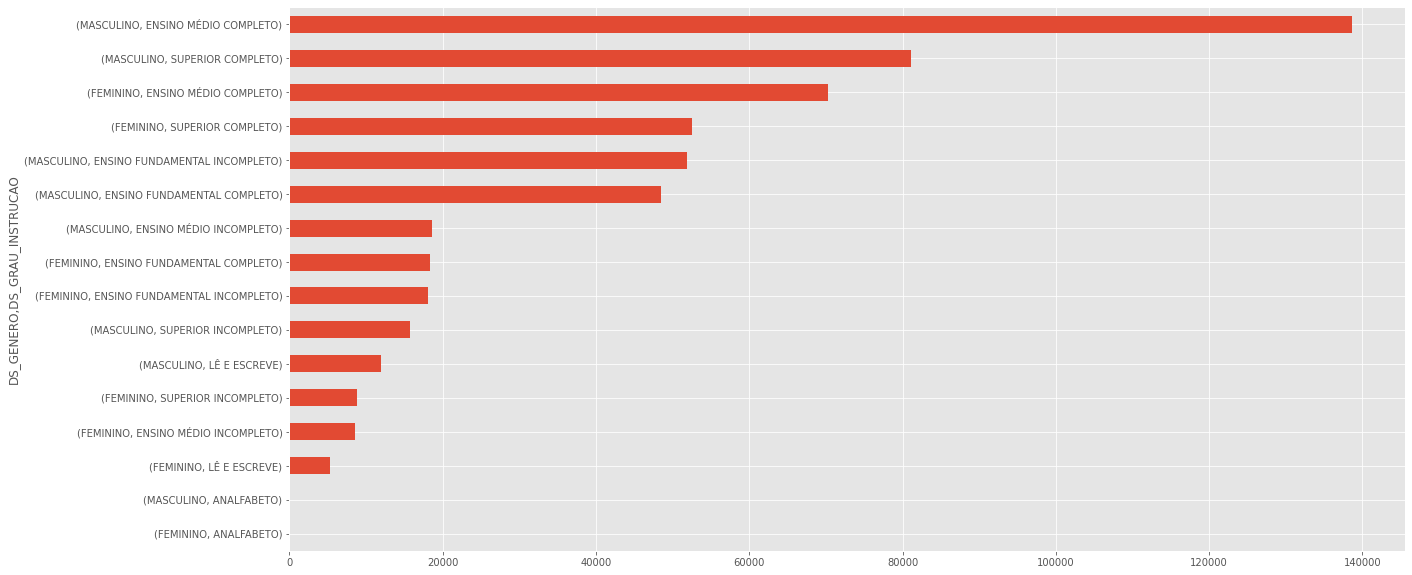

In [32]:
candidatos.groupby(by='DS_GENERO')['DS_GRAU_INSTRUCAO'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [33]:
profissoes = candidatos[['DS_OCUPACAO']].drop_duplicates().sort_values('DS_OCUPACAO').set_index('DS_OCUPACAO')
profissoes.head(50)

""
DS_OCUPACAO
ADMINISTRADOR
ADVOGADO
AGENCIADOR DE PROPAGANDA
AGENTE ADMINISTRATIVO
AGENTE DE SAÚDE E SANITARISTA
AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR
AGENTE DE VIAGEM
AGENTE POSTAL
AGRICULTOR


In [34]:
# Procurando candidatos que são policiais
policial = candidatos[candidatos['DS_OCUPACAO'].str.contains('POLICIAL')]
policial

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
27,SÃO LOURENÇO DA SERRA,VEREADOR,250001207271,WELLINGTON EMMANUEL CAETANO,CABO EMANNUEL PM,PODE,36,MASCULINO,SUPERIOR INCOMPLETO,PARDA,POLICIAL MILITAR,27875,NaN
68,JAPURÁ,VEREADOR,40001077370,PEDRO PAIVA DA SILVA,P PAIVA,PSD,56,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,POLICIAL MILITAR,12308,560000.0
70,TRINDADE,VEREADOR,90000955509,CLEIDIOMAR SEABRA SANTANA,SARGENTO SEABRA,PSDB,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,PARDA,POLICIAL MILITAR,69693,NaN
145,ARAUÁ,VEREADOR,260000874685,JOSEVALDO BATISTA MOREIRA,VENTINHA,PSB,49,MASCULINO,SUPERIOR COMPLETO,BRANCA,POLICIAL MILITAR,12308,8000.0
220,MILHÃ,VEREADOR,60001195187,VAGNER CHARLES DA SILVA,VAGNER CHARLES,PL,52,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,POLICIAL MILITAR,12308,32500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547963,LAGOA DO CARRO,VEREADOR,170001074736,EDIMILSON RODRIGUES DE SOUZA,NENA POLICIAL,PATRIOTA,55,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,POLICIAL MILITAR,12308,NaN
547982,RIO DE JANEIRO,VEREADOR,190000944652,WERLEIS FIGUEIRA DE AGUIAR,AGUIAR,PSD,39,MASCULINO,SUPERIOR COMPLETO,BRANCA,POLICIAL MILITAR,1594577,NaN
547997,CAMPOS DOS GOYTACAZES,VEREADOR,190001014554,EDSON DOS SANTOS FARIA,EDSON SANTOS,DC,55,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,POLICIAL MILITAR,319311,NaN
548074,BOM JESUS DO ITABAPOANA,VEREADOR,190001072005,ADALBERTO SERAFIM QUINTAL,ADALBERTO SERAFIM,PSB,51,MASCULINO,SUPERIOR COMPLETO,BRANCA,POLICIAL CIVIL,21120,426500.0


In [35]:
candidatos[candidatos['DS_OCUPACAO'] == 'EMPRESÁRIO']

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
0,MAURILÂNDIA,VEREADOR,90001032264,VALDINEI SILVA VIEIRA,DINEI MOTOS,MDB,40,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,17122,40000.00
8,ANDRADINA,VEREADOR,250000836854,JUCEI SANTANA,SANTANA CONSTRUTOR,PSDB,54,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,PARDA,EMPRESÁRIO,31597,NaN
10,VICENTINA,VEREADOR,120000852607,JOSÉ PEREIRA DE FIGUEIREDO,J PEREIRA,PSDB,54,MASCULINO,ENSINO MÉDIO COMPLETO,PRETA,EMPRESÁRIO,12308,NaN
14,VILHENA,VEREADOR,220000849062,LUIZ CARLOS CORREIA DE OLIVEIRA,LUIZ DO MERCADO,PP,48,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,57344,820000.00
20,CACHOEIRA DOURADA,VEREADOR,90000741782,EDSON FERNANDES LIRA,EDSON LIRA,PODE,27,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,31798,70000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548262,LIMEIRA,VEREADOR,250001208483,MONICA FRANZINI KRAUSS,MONICA KRAUSS,DEM,52,FEMININO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,125484,7127730.05
548289,UBERLÂNDIA,VEREADOR,130001011364,LEANDRO ALVES DA SILVA,LEANDRÃO DO BASQUETE,PSC,37,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,PRETA,EMPRESÁRIO,549425,3000.00
548296,JARDINÓPOLIS,VEREADOR,250001191822,AGUINALDO JOSE DE SOUZA,AGNALDO GÊMEO,MDB,38,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,21839,NaN
548307,BURITIZAL,VEREADOR,250001067925,ZAINA APARECIDA PISTORE,ZAINA DA LENICE,MDB,52,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,EMPRESÁRIO,12308,38748.00


In [36]:
#Fazendo um recorte dos candidatos que se declaram empresários
cand_empresarios = candidatos[candidatos['DS_OCUPACAO'] == 'EMPRESÁRIO']

In [37]:
cand_empresarios['VR_BEM_CANDIDATO'].max()

10613585493.22

In [38]:
#Identificando o candidato com maior valor de bens declarados da planilha do TSE
cand_empresarios[cand_empresarios['VR_BEM_CANDIDATO'] == 10613585493.22]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
431628,ABAETETUBA,PREFEITO,140001040663,ADAMOR DIAS BITENCOURT,ADAMOR BITENCOURT,PTB,48,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,262824,1.061359e+10


In [39]:
cand_empresarios['VR_BEM_CANDIDATO'].mean()

1257818.6416200402

In [40]:
cand_empresarios.describe()

,SQ_CANDIDATO,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
count,3.292200e+04,32922.000000,3.292200e+04,2.491300e+04
mean,1.654198e+11,45.041462,1.463959e+05,1.257819e+06
std,6.913409e+10,10.673309,5.889658e+05,6.878977e+07
min,1.000066e+10,18.000000,-1.000000e+00,0.000000e+00
25%,1.200009e+11,37.000000,1.230800e+04,4.850000e+04
50%,1.600011e+11,45.000000,3.778200e+04,1.720000e+05
75%,2.400010e+11,53.000000,1.230770e+05,4.500000e+05
max,2.700013e+11,103.000000,5.179938e+07,1.061359e+10


In [41]:
#Os 25% mais ricos

mais_ricos = cand_empresarios[cand_empresarios['VR_BEM_CANDIDATO'] > 4.500000e+05]

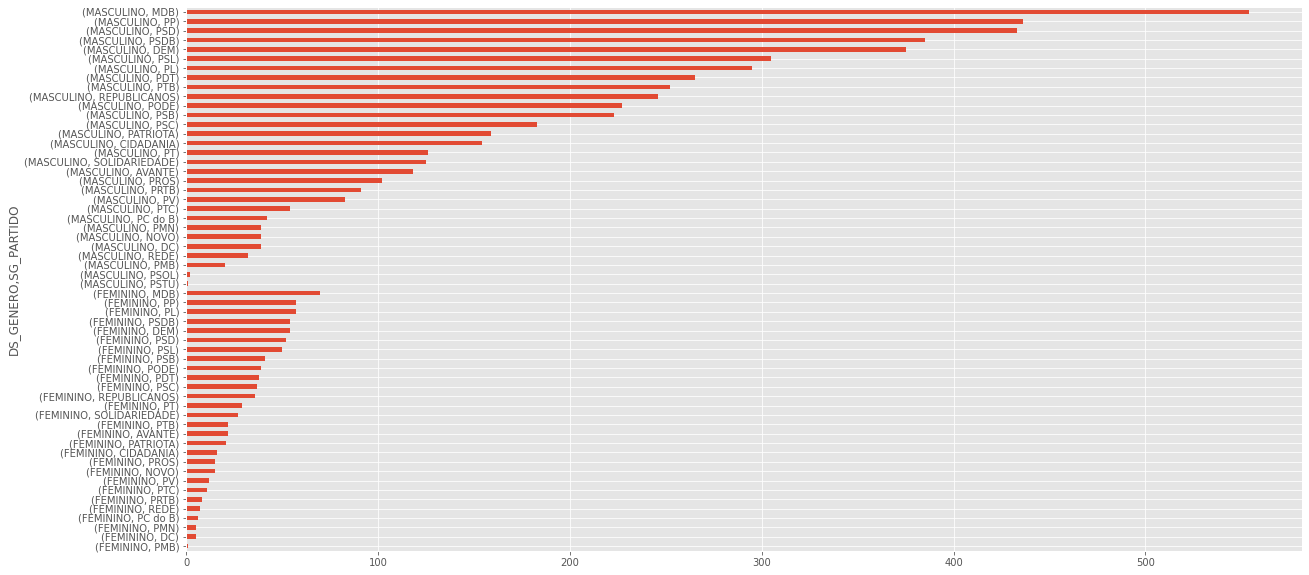

In [42]:
mais_ricos.groupby(by='DS_GENERO')['SG_PARTIDO'].value_counts(ascending=True).plot(kind='barh')

In [43]:
mais_ricos.nlargest(10, 'VR_BEM_CANDIDATO')

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
431628,ABAETETUBA,PREFEITO,140001040663,ADAMOR DIAS BITENCOURT,ADAMOR BITENCOURT,PTB,48,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,EMPRESÁRIO,262824,1.061359e+10
403261,PONTAL DO PARANÁ,PREFEITO,160001000870,JOÃO CARLOS RIBEIRO,JOAO,PSC,79,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,213480,1.553326e+09
151754,CASTRO,PREFEITO,160001128835,MARCELO MENARIM,MARCELO MENARIM,PSD,39,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,387099,1.022161e+09
12599,ARAGUACEMA,VICE-PREFEITO,270001105064,WANDERLEY LUZINI,WANDERLEY,PSL,63,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,EMPRESÁRIO,-1,8.129569e+08
390542,CAPÃO DA CANOA,VEREADOR,210001028987,ADRIANO NEVES PEREIRA,ADRIANO CHUVA,MDB,41,MASCULINO,ENSINO MÉDIO INCOMPLETO,PRETA,EMPRESÁRIO,27323,5.707950e+08
10131,IBIRUBÁ,PREFEITO,210000842505,ABEL GRAVE,ABEL GRAVE,REPUBLICANOS,37,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,EMPRESÁRIO,123077,4.098355e+08
426349,BETIM,PREFEITO,130000692020,VITTORIO MEDIOLI,VITTORIO MEDIOLI,PSD,69,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,5154459,3.517244e+08
491474,LAURO DE FREITAS,PREFEITO,50000700410,TEOBALDO LUÍS DA COSTA,TEOBALDO,DEM,66,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,1065251,3.412866e+08
44186,NOVA LIMA,VEREADOR,130001084556,VERONICE DA FONSECA SILVA,VERONICE DA FONSECA,DEM,49,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,EMPRESÁRIO,201825,1.821260e+08
24395,QUITANDINHA,VEREADOR,160000936437,JACKSON JOSE MENDES DE MOURA,JACKSON DO QUIRERA,PROS,43,MASCULINO,SUPERIOR INCOMPLETO,PARDA,EMPRESÁRIO,12308,1.801830e+08


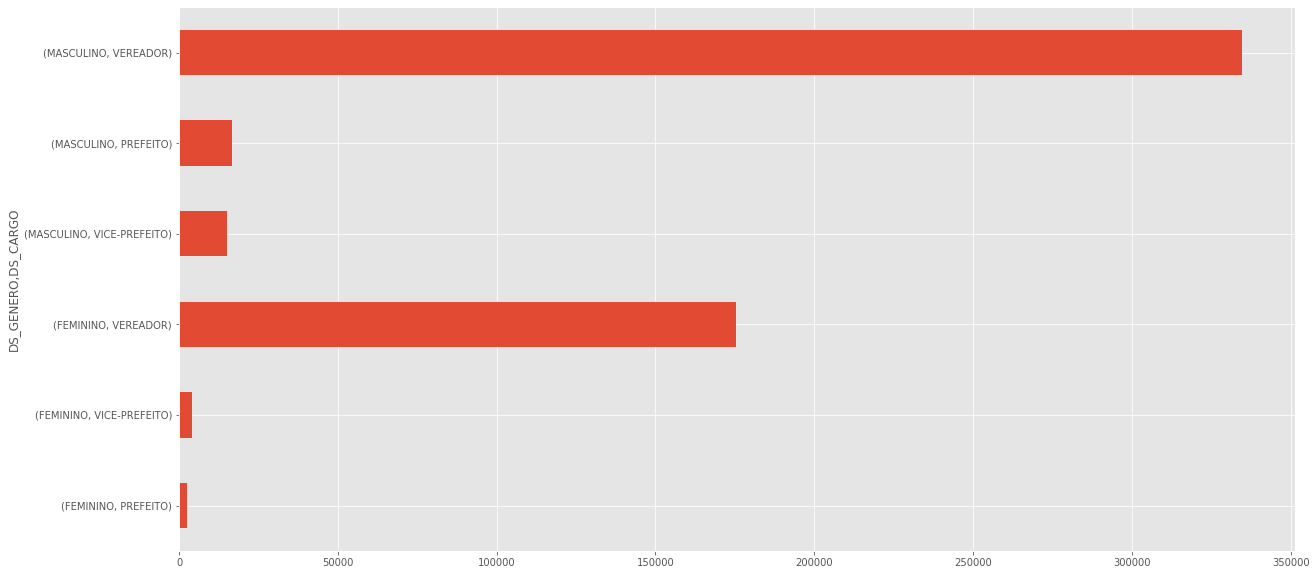

In [44]:
candidatos.groupby(by='DS_GENERO')['DS_CARGO'].value_counts(ascending=True).plot(kind='barh')

In [45]:
#Contando o número de candidatos por partido
candidatos['SG_PARTIDO'].value_counts()

MDB              44549
PSD              39201
PP               38025
DEM              32742
PSDB             32723
PT               31239
REPUBLICANOS     28382
PDT              28309
PL               28101
PSB              26571
PTB              23418
PSL              21846
PODE             20315
PSC              17866
CIDADANIA        17294
SOLIDARIEDADE    16866
AVANTE           15038
PATRIOTA         14198
PV               12051
PROS             11707
PC do B          10476
PRTB              7774
PTC               6678
PMN               5000
DC                4758
REDE              4742
PSOL              4616
PMB               2733
NOVO               620
PSTU               204
UP                 133
PCO                 88
PCB                 76
Name: SG_PARTIDO, dtype: int64

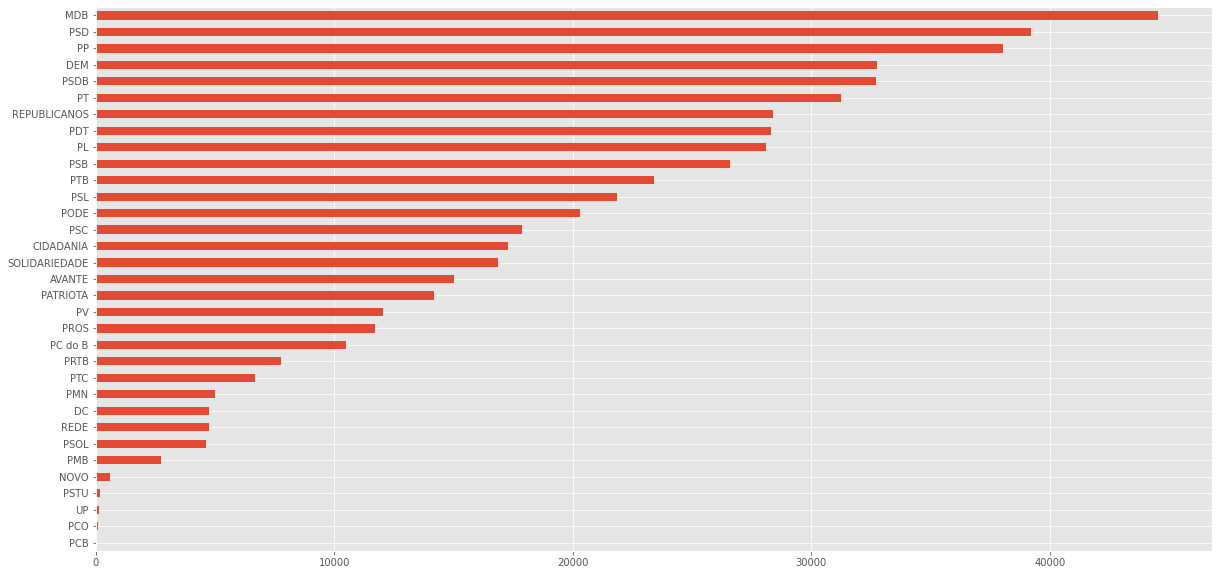

In [46]:
candidatos['SG_PARTIDO'].value_counts(ascending=True).plot(kind='barh')

In [47]:
candidatos['VR_DESPESA_MAX_CAMPANHA'].max()

51799384

In [48]:
#Candidatos a prefeito da cidade de São Paulo têm mais dinheiro para gastar na campanha

candidatos[candidatos['VR_DESPESA_MAX_CAMPANHA'] == 51799384]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
52641,SÃO PAULO,PREFEITO,250000693062,FILIPE TOMAZELLI SABARA,SABARÁ,NOVO,37,MASCULINO,SUPERIOR COMPLETO,BRANCA,EMPRESÁRIO,51799384,5111138.94
93552,SÃO PAULO,PREFEITO,250001094597,CELSO UBIRAJARA RUSSOMANNO,CELSO RUSSOMANNO,REPUBLICANOS,64,MASCULINO,SUPERIOR COMPLETO,BRANCA,JORNALISTA E REDATOR,51799384,1772944.11
135990,SÃO PAULO,PREFEITO,250001012981,MÁRCIO LUIZ FRANÇA GOMES,MÁRCIO FRANÇA,PSB,57,MASCULINO,SUPERIOR COMPLETO,BRANCA,OUTROS,51799384,272864.37
154672,SÃO PAULO,PREFEITO,250000641390,ARTHUR MOLEDO DO VAL,ARTHUR DO VAL,PATRIOTA,34,MASCULINO,SUPERIOR COMPLETO,BRANCA,DEPUTADO,51799384,408635.44
191021,SÃO PAULO,PREFEITO,250000746936,GUILHERME CASTRO BOULOS,GUILHERME BOULOS,PSOL,38,MASCULINO,SUPERIOR COMPLETO,BRANCA,PROFESSOR DE ENSINO SUPERIOR,51799384,15416.00
198896,SÃO PAULO,PREFEITO,250000755896,JILMAR AUGUSTINHO TATTO,JILMAR TATTO,PT,55,MASCULINO,SUPERIOR COMPLETO,BRANCA,OUTROS,51799384,126189.86
284995,SÃO PAULO,PREFEITO,250001172314,ANTÔNIO CARLOS SILVA,ANTÔNIO CARLOS,PCO,58,MASCULINO,SUPERIOR COMPLETO,PRETA,PROFESSOR DE ENSINO MÉDIO,51799384,50000.00
314865,SÃO PAULO,PREFEITO,250000658458,JOICE CRISTINA HASSELMANN,JOICE HASSELMANN,PSL,42,FEMININO,SUPERIOR COMPLETO,BRANCA,JORNALISTA E REDATOR,51799384,186980.00
320171,SÃO PAULO,PREFEITO,250001152470,MARINA MEDEIROS HELOU,MARINA HELOU,REDE,33,FEMININO,SUPERIOR COMPLETO,BRANCA,DEPUTADO,51799384,2244000.00
362818,SÃO PAULO,PREFEITO,250001013564,JOSE LEVY FIDELIX DA CRUZ,LEVY FIDELIX,PRTB,69,MASCULINO,SUPERIOR COMPLETO,BRANCA,JORNALISTA E REDATOR,51799384,954597.41


In [49]:
candidatos['VR_DESPESA_MAX_CAMPANHA'].mean()

98407.80378379069

In [50]:
candidatos['VR_DESPESA_MAX_CAMPANHA'].median()                        # -1 == não declarou

21691.0

In [51]:
candidatos['VR_BEM_CANDIDATO'].median()

85000.0

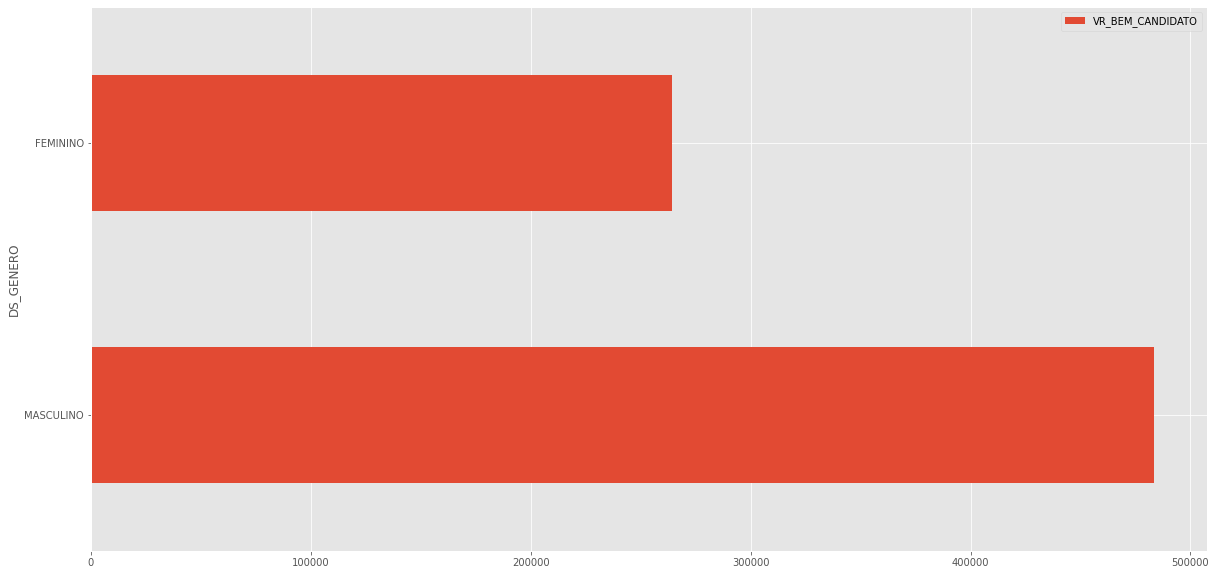

In [52]:
#Agrupando bens e genêro. Riqueza também é uma questão de genêro
candidatos[['DS_GENERO', 'VR_BEM_CANDIDATO']].groupby('DS_GENERO').mean().sort_values('VR_BEM_CANDIDATO', 
                                                                                             ascending=False).plot(kind='barh')

In [53]:
#Quais partidos têm mais dinheiro para gastar nas campanhas
candidatos.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=False)

SG_PARTIDO
MDB              2789899510
PT               2692526880
PSD              2632411035
REPUBLICANOS     2561769560
PSDB             2485100445
PSL              2466559301
DEM              2361897403
PDT              2350037032
PP               2239044375
PSB              2160641336
PL               2127315747
PODE             2105776427
PTB              1996857328
SOLIDARIEDADE    1947840985
PSC              1870988930
PATRIOTA         1838853699
AVANTE           1817206234
CIDADANIA        1681075671
PC do B          1625415725
PRTB             1573945932
PV               1530830329
PROS             1487318977
PTC              1327775872
PSOL             1309188805
PMN              1011798281
DC               1000546996
REDE              928945412
PMB               785952474
NOVO              569302113
PSTU              290103764
PCO               247662031
UP                103161552
PCB                43086558
Name: VR_DESPESA_MAX_CAMPANHA, dtype: int64

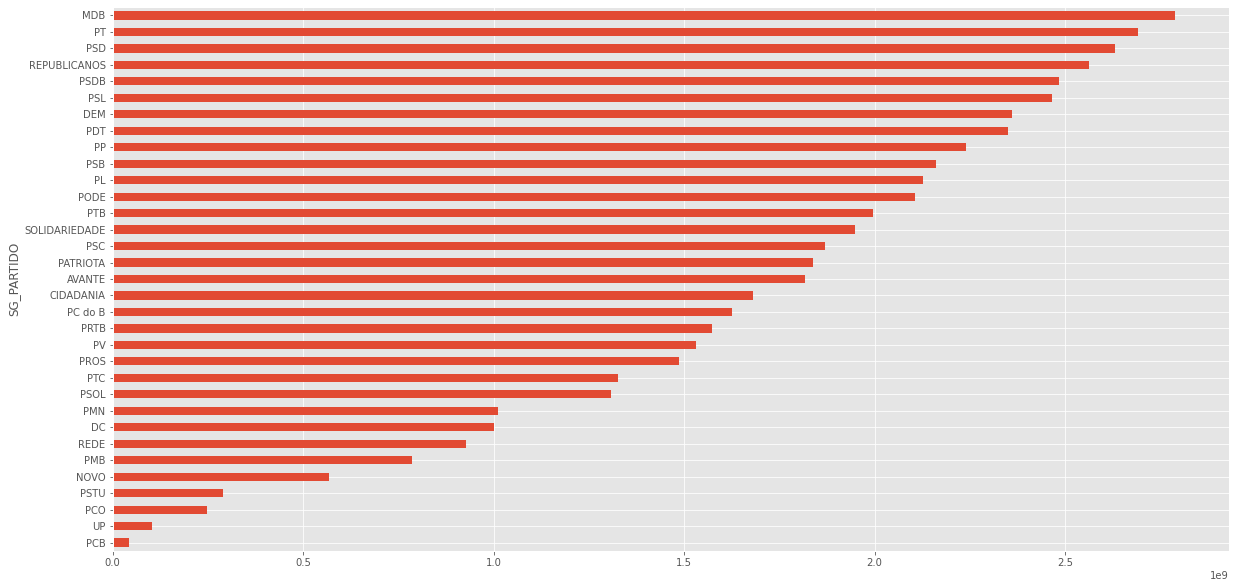

In [54]:
candidatos.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=True).plot(kind='barh')

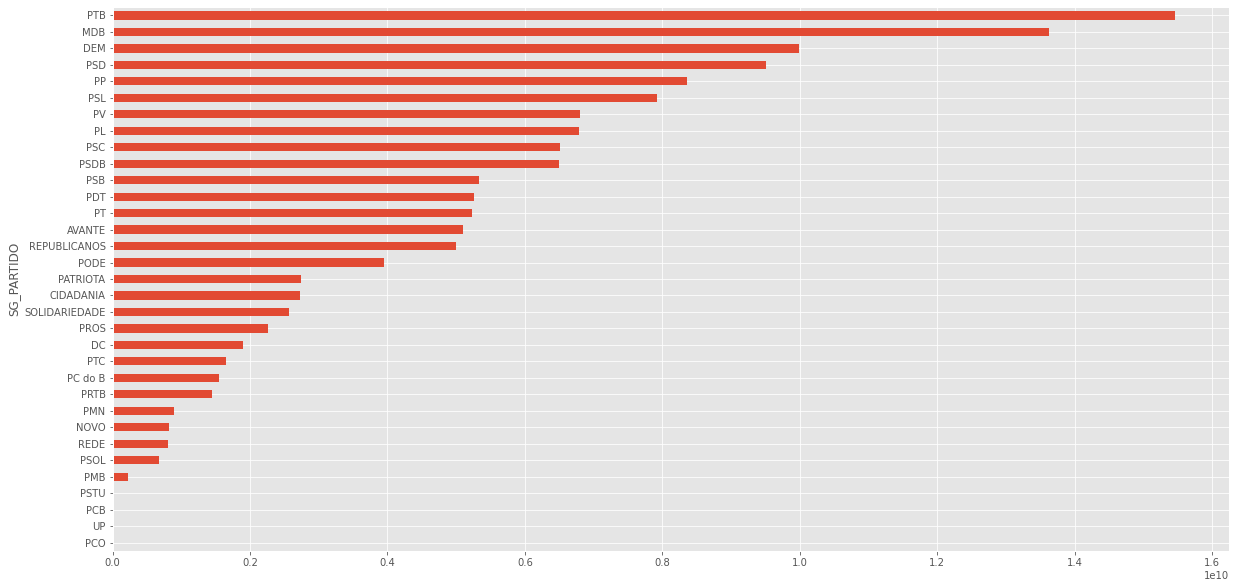

In [55]:
#Quais partidos têm os candidatos mais ricos
candidatos.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].sum().sort_values(ascending=True).plot(kind='barh')

In [56]:
candidatos[candidatos['VR_DESPESA_MAX_CAMPANHA'] == candidatos['VR_DESPESA_MAX_CAMPANHA'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO']]

,DS_GENERO,DS_COR_RACA,NM_CANDIDATO
52641,MASCULINO,BRANCA,FILIPE TOMAZELLI SABARA
93552,MASCULINO,BRANCA,CELSO UBIRAJARA RUSSOMANNO
135990,MASCULINO,BRANCA,MÁRCIO LUIZ FRANÇA GOMES
154672,MASCULINO,BRANCA,ARTHUR MOLEDO DO VAL
191021,MASCULINO,BRANCA,GUILHERME CASTRO BOULOS
198896,MASCULINO,BRANCA,JILMAR AUGUSTINHO TATTO
284995,MASCULINO,PRETA,ANTÔNIO CARLOS SILVA
314865,FEMININO,BRANCA,JOICE CRISTINA HASSELMANN
320171,FEMININO,BRANCA,MARINA MEDEIROS HELOU
362818,MASCULINO,BRANCA,JOSE LEVY FIDELIX DA CRUZ


In [57]:
candidatos[candidatos['VR_BEM_CANDIDATO'] == candidatos['VR_BEM_CANDIDATO'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO']]

,DS_GENERO,DS_COR_RACA,NM_CANDIDATO
431628,MASCULINO,PARDA,ADAMOR DIAS BITENCOURT


In [58]:
candidatos[['NM_URNA_CANDIDATO', 'DS_GENERO', 'DS_COR_RACA','DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA','VR_BEM_CANDIDATO']]                                

,NM_URNA_CANDIDATO,DS_GENERO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,VR_BEM_CANDIDATO
0,DINEI MOTOS,MASCULINO,PARDA,EMPRESÁRIO,17122,40000.00
1,BARRERITO,MASCULINO,PARDA,OUTROS,38798,NaN
2,MÁRCIO CAMARGO,MASCULINO,BRANCA,VEREADOR,-1,75000.00
3,DONATO LIMA,MASCULINO,PRETA,PUBLICITÁRIO,93964,18000.00
4,DAYANE,FEMININO,BRANCA,DONA DE CASA,12308,NaN
...,...,...,...,...,...,...
548334,SANDRA DE BONA,FEMININO,PARDA,AGRICULTOR,12308,20000.00
548335,RENATO PINTO ROSA,MASCULINO,PARDA,OUTROS,67900,57000.00
548336,SARACURA,MASCULINO,PARDA,"TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA D...",12308,1000.00
548337,PATI LEIVA,FEMININO,BRANCA,OUTROS,692183,NaN


In [60]:
instrucao = candidatos[['DS_GRAU_INSTRUCAO']].value_counts()
instrucao                

DS_GRAU_INSTRUCAO            
ENSINO MÉDIO COMPLETO            208971
SUPERIOR COMPLETO                133661
ENSINO FUNDAMENTAL INCOMPLETO     69932
ENSINO FUNDAMENTAL COMPLETO       66832
ENSINO MÉDIO INCOMPLETO           27208
SUPERIOR INCOMPLETO               24510
LÊ E ESCREVE                      17205
ANALFABETO                           20
dtype: int64

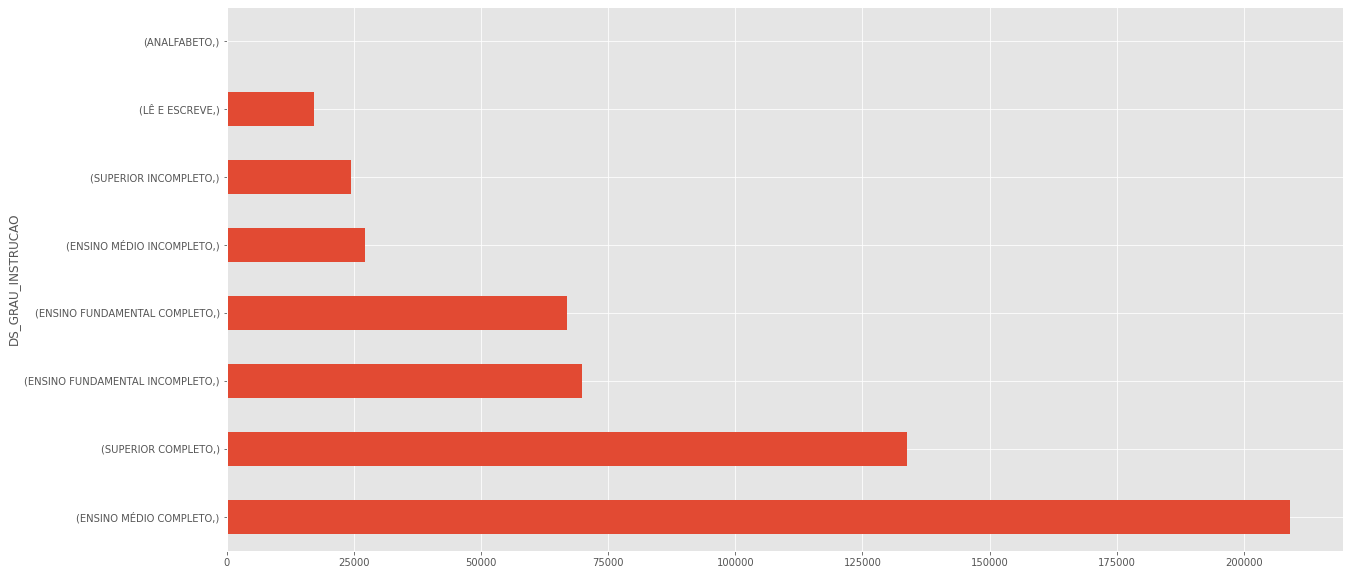

In [65]:
instrucao.plot(kind='barh')